Análisis de Datos

Rodolfo Parra

Árboles de Decisión

Grupo: 11

Tutora: Sandra Milena Patino Avella


In [11]:
#Importamos las librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [15]:
#Cargamos el achivo del dataset, y mostramos las primeras 5 filas
data = pd.read_csv("Desktop/Arbol_decision/winequality-red.csv")
data.head(100)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
95,4.7,0.600,0.17,2.3,0.058,17.0,106.0,0.9932,3.85,0.60,12.9,6
96,6.8,0.775,0.00,3.0,0.102,8.0,23.0,0.9965,3.45,0.56,10.7,5
97,7.0,0.500,0.25,2.0,0.070,3.0,22.0,0.9963,3.25,0.63,9.2,5
98,7.6,0.900,0.06,2.5,0.079,5.0,10.0,0.9967,3.39,0.56,9.8,5


In [17]:
valores_unicos = data["quality"].unique()

In [6]:
print(valores_unicos)

[5 6 7 4 8 3]


In [7]:
conteo = data["quality"].value_counts()
print(conteo)

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64


In [ ]:
#Mostramos cuántas filas y columnas tiene el
data.shape

(1599, 12)

In [ ]:
#Mostramos las estadísticas básicas de las columnas
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
#Calcula y muestra el número de valores faltantes en cada columna de lo datos. En este caso no tenemos valore faltantes
data.isna().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


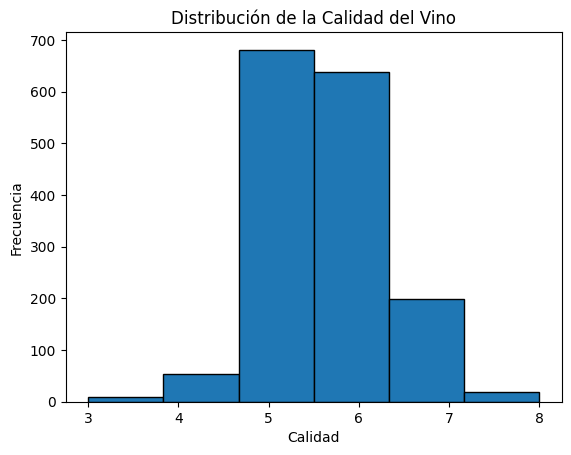

In [13]:
plt.hist(data["quality"], bins=6, edgecolor='black')
plt.title("Distribución de la Calidad del Vino")
plt.xlabel("Calidad")
plt.ylabel("Frecuencia")
plt.show()

podemos observar en el histograma que el dataset está desbalanceado, con más valores en la calidad 5 y 6

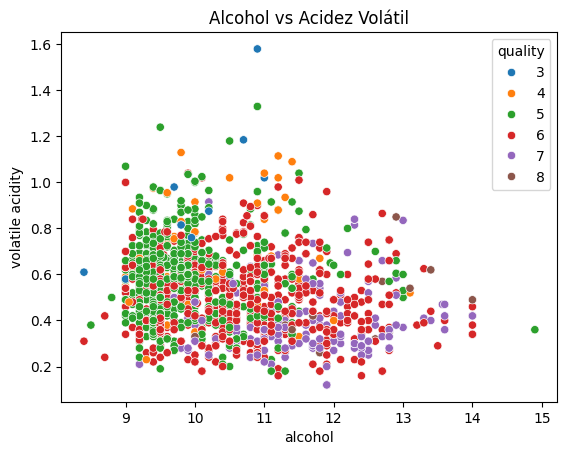

In [15]:
# Scatterplot entre alcohol y acidez volátil
sns.scatterplot(x="alcohol", y="volatile acidity", hue="quality", palette='tab10', data=data)
plt.title("Alcohol vs Acidez Volátil")
plt.show()

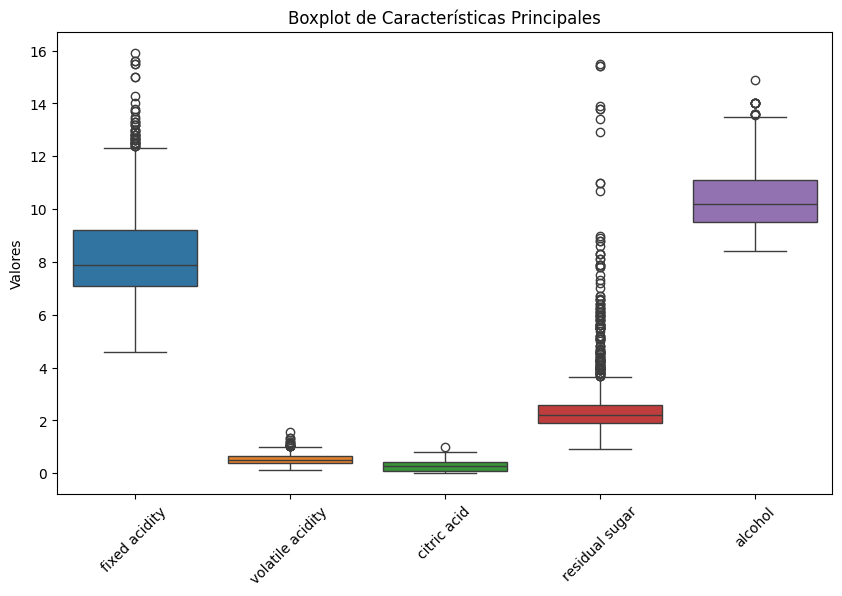

In [16]:
# Boxplot de características principales
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'alcohol']])
plt.xticks(rotation=45)
plt.title('Boxplot de Características Principales')
plt.ylabel('Valores')
plt.show()

In [17]:
# Variables predictoras
predictors_col = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
                 'pH', 'sulphates', 'alcohol']
predictors = data[predictors_col]

# Variable objetivo (multiclase)
target = data[['quality']]


In [19]:
predictors

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [20]:
target

,quality
0,5
1,5
2,5
3,6
4,5
...,...
1594,5
1595,6
1596,6
1597,5


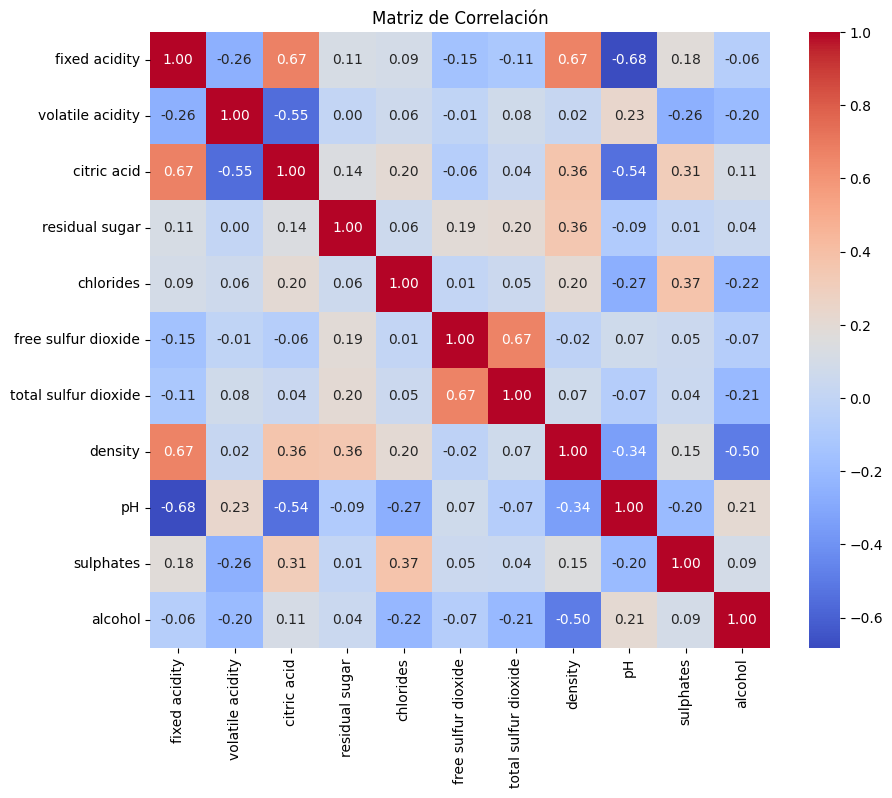

In [21]:
corr = predictors.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

In [22]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=42)

In [23]:
tree = DecisionTreeClassifier(class_weight='balanced', random_state=42)
arbol = tree.fit(X_train, y_train)

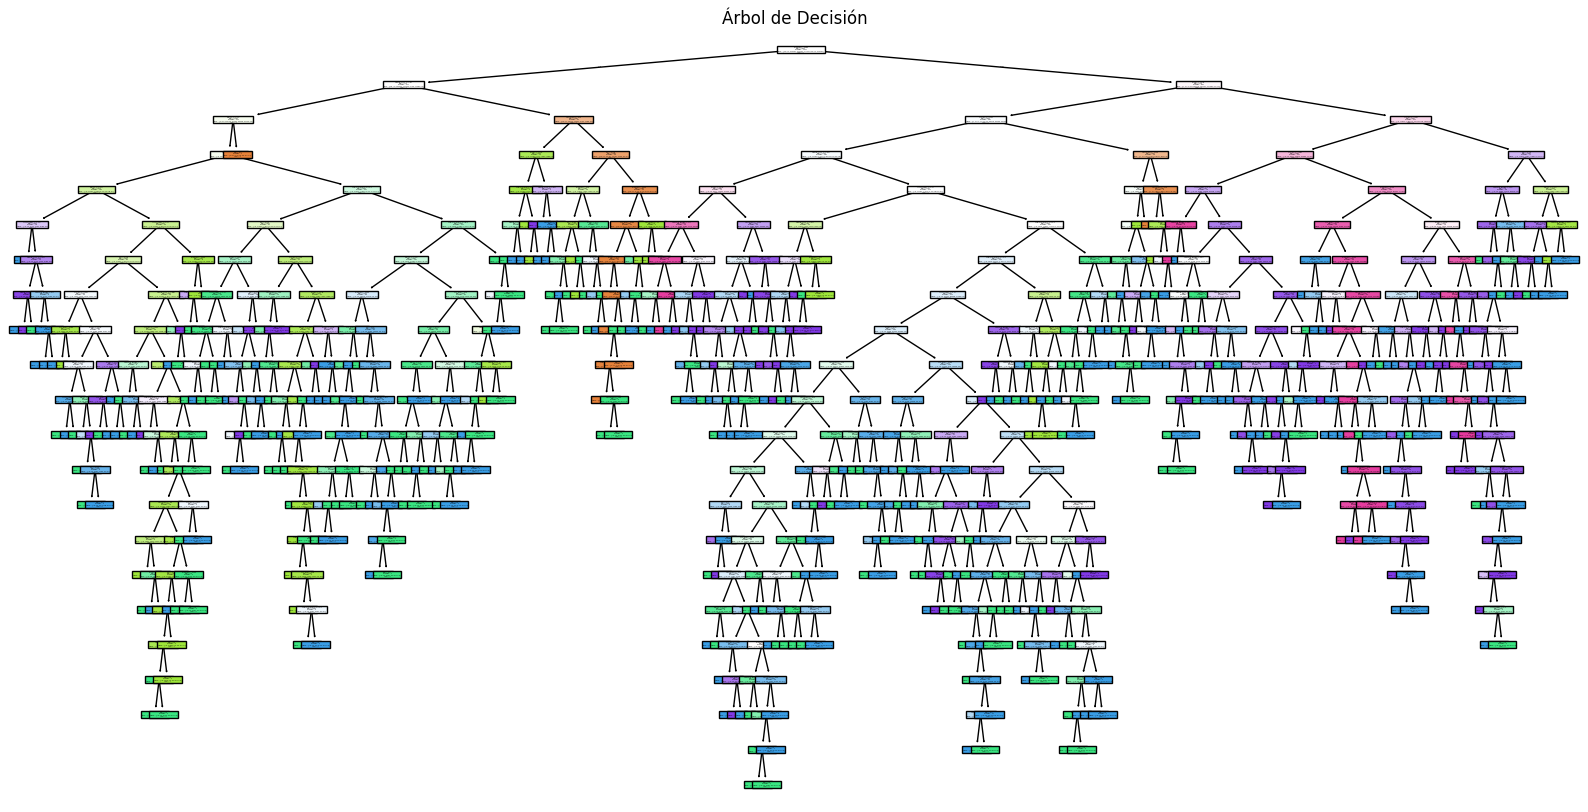

In [24]:
plt.figure(figsize=(20, 10))
plot_tree(arbol, feature_names=predictors.columns, class_names=[str(c) for c in sorted(data['quality'].unique())], filled=True)
plt.title("Árbol de Decisión")
plt.show()

In [27]:
predicciones = arbol.predict(X_test)
predicciones

array([5, 5, 5, 5, 6, 5, 5, 4, 6, 7, 7, 6, 6, 5, 6, 6, 6, 6, 7, 5, 5, 6,
       6, 6, 5, 6, 6, 6, 5, 6, 6, 5, 6, 4, 6, 5, 6, 6, 5, 6, 5, 5, 7, 5,
       4, 5, 6, 6, 5, 6, 5, 5, 6, 7, 5, 6, 6, 7, 4, 5, 6, 6, 6, 6, 7, 5,
       7, 5, 5, 6, 4, 6, 6, 5, 6, 5, 6, 5, 5, 7, 5, 7, 5, 6, 6, 6, 5, 6,
       6, 6, 5, 4, 5, 5, 5, 5, 5, 6, 3, 6, 4, 4, 5, 7, 4, 7, 6, 5, 4, 5,
       7, 5, 7, 5, 6, 6, 6, 5, 6, 4, 6, 6, 6, 6, 6, 5, 6, 6, 5, 5, 6, 5,
       5, 6, 6, 5, 5, 5, 5, 6, 7, 6, 7, 5, 4, 5, 6, 6, 5, 5, 6, 7, 6, 5,
       6, 5, 5, 7, 5, 6, 6, 7, 6, 4, 5, 5, 6, 5, 5, 5, 5, 5, 7, 5, 7, 5,
       7, 5, 5, 6, 5, 6, 5, 6, 5, 5, 6, 6, 5, 5, 6, 5, 5, 6, 6, 5, 5, 6,
       5, 7, 5, 6, 4, 5, 6, 4, 5, 6, 6, 6, 8, 5, 5, 7, 4, 4, 6, 5, 6, 5,
       6, 6, 6, 6, 6, 5, 5, 7, 5, 7, 5, 5, 6, 6, 5, 7, 5, 6, 6, 6, 5, 5,
       5, 7, 6, 7, 5, 6, 7, 5, 6, 6, 6, 6, 6, 5, 6, 6, 5, 6, 6, 5, 5, 6,
       7, 6, 5, 5, 6, 6, 5, 6, 6, 6, 6, 5, 5, 8, 7, 6, 7, 5, 6, 5, 5, 7,
       5, 6, 6, 6, 4, 6, 6, 5, 5, 6, 6, 6, 6, 6, 5,

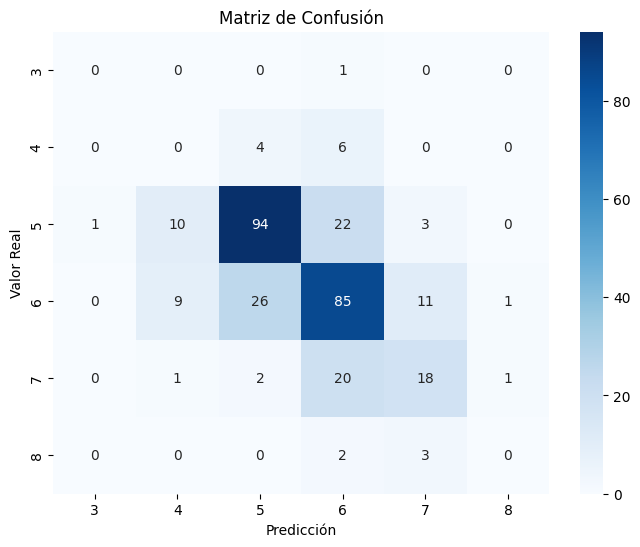

In [33]:
cm = confusion_matrix(y_test, predicciones)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.sort(data['quality'].unique()),
            yticklabels=np.sort(data['quality'].unique()))
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusión")
plt.show()

In [36]:
print(metrics.classification_report(y_test, predicciones))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.75      0.72      0.73       130
           6       0.62      0.64      0.63       132
           7       0.51      0.43      0.47        42
           8       0.00      0.00      0.00         5

    accuracy                           0.62       320
   macro avg       0.31      0.30      0.31       320
weighted avg       0.63      0.62      0.62       320



In [42]:
print("Accuracy:", accuracy_score(y_test, predicciones))
print("Precision (weighted):", precision_score(y_test, predicciones, average='weighted'))
print("Recall (weighted):", recall_score(y_test, predicciones, average='weighted'))
print("F1 Score (weighted):", f1_score(y_test, predicciones, average='weighted'))

Accuracy: 0.615625
Precision (weighted): 0.6283878968253969
Recall (weighted): 0.615625
F1 Score (weighted): 0.6213639278748303


### Interpretación de Resultados

Se realizó un análisis con un árbol de decisión usando el conjunto de datos **Wine Quality**, que contiene información sobre diferentes vinos tintos y su calidad.

Primero, se observó que el dataset no está balanceado. Hay más vinos con calificaciones de 5 y 6, y muy pocos con calificaciones extremas como 3 o 8. Esto se notó claramente al ver el histograma de la variable de calidad.

Después, se hizo un gráfico de dispersión con las variables "alcohol" y "acidez volátil". En este gráfico se pudo ver una ligera separación entre las calidades, lo que indica que esas características podrían influir bastante en la calidad del vino.

También se revisaron las correlaciones entre las diferentes variables, y se encontró, por ejemplo, que cuando hay más acidez fija, el pH tiende a ser más bajo, lo cual tiene sentido químicamente.

Al entrenar el modelo de árbol de decisión con las clases originales de calidad (es decir, sin agruparlas en “bueno” o “malo”), se logró un rendimiento aceptable. Las métricas como accuracy, precision, recall y F1-score mostraron que el modelo funciona bien con algunas clases, pero tiene más dificultad para predecir las que tienen pocos datos.

La matriz de confusión mostró que el modelo tiene mejores resultados con las calificaciones que aparecen más seguido, como 5 y 6, y se equivoca más con las que casi no aparecen.

Por último, se concluyó que este modelo puede servir como punto de partida, pero se podrían hacer mejoras, como balancear mejor las clases pra que funcione mejor.
